## CS986 Team 5 
#### Blessing Adeyemi - 202173887, Ayola Jaiyesimi - 202193845 , Mohammed Ansari - 202182357 , Sunilkamar Jambagi - 202162237.

Project Objective
----------
The project was to predict the genre of a song, which constitutes a classification problem. The training and test datasets comprised of several songs and features which could be used to predict the genre. To begin the project, data cleaning and preprocessing was done before any analysis and the distribution of classes in the target variable is checked. The primary packages used for the course of the project are scikit-learn, pandas, matplotlib and numpy.

# Solution Process
--------
The first steps involved importing the data and cleaning the data. The data was imbalanced as there were few occurences of many classes and it was multiclass as there were several classes to predict for.  . 

Our baseline model was built and fitted to data and this served as a comparison metrices for other models. Other models were trained and set with different hyperparameters to determine how well they performed. This was also checked to ensure that models were not overfitting/ underfitting to the given data.


# Final Model Selection Process
--------
Several models and variations/ combinations of models were built. The top three models include:
- Logistic Classification: As the goal was to predict categorical values, this is the basic and most primal algorithm in classification problem as it performs well in predictions for multiple classes.
- Random Forest: This was a great performing single estimator. This also motivated it's use in several ensemble learning methods combined with other estimators.
- Voting Classifier: This involved the combination of several models which are individaully trained and the majority predictions is chosen as the final prediction. This complements models that are weak on their own.

The final model was the Voting Classifier which after comparison with the baseline model and its general performance on the dataset were better. The details for selection are explained in the course of the report.

## Section 1 - Data pre-processing

In [1]:
# Importing relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier 
from sklearn.feature_selection import mutual_info_classif
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [2]:
# Importing the train set
data = pd.read_csv("/Users/admin/CS98XClassificationTrain.csv")

In [3]:
# Observing data features
data.shape

(453, 15)

In [4]:
# Checking the datatype and null value inspection
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         453 non-null    int64 
 1   title      453 non-null    object
 2   artist     453 non-null    object
 3   year       453 non-null    int64 
 4   bpm        453 non-null    int64 
 5   nrgy       453 non-null    int64 
 6   dnce       453 non-null    int64 
 7   dB         453 non-null    int64 
 8   live       453 non-null    int64 
 9   val        453 non-null    int64 
 10  dur        453 non-null    int64 
 11  acous      453 non-null    int64 
 12  spch       453 non-null    int64 
 13  pop        453 non-null    int64 
 14  top genre  438 non-null    object
dtypes: int64(12), object(3)
memory usage: 53.2+ KB


In [5]:
# It was observed that there were 453 instances and 15 attributes, with only one attribute ("top genre") 
# having a total of 15 missing values

# checking the null values
data.isnull().sum()

Id            0
title         0
artist        0
year          0
bpm           0
nrgy          0
dnce          0
dB            0
live          0
val           0
dur           0
acous         0
spch          0
pop           0
top genre    15
dtype: int64

In [6]:
data['top genre'].value_counts()

adult standards       68
album rock            66
dance pop             61
glam rock             16
brill building pop    16
                      ..
canadian folk          1
acoustic blues         1
drone folk             1
classic danish pop     1
british dance band     1
Name: top genre, Length: 86, dtype: int64

In [ ]:
# replacing missing values with most recurrent value
# data.fillna(value = 'adult standards', inplace = True)

In [7]:
data.head()

,Id,title,artist,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top genre
0,1,My Happiness,Connie Francis,1996,107,31,45,-8,13,28,150,75,3,44,adult standards
1,2,Unchained Melody,The Teddy Bears,2011,114,44,53,-8,13,47,139,49,3,37,NaN
2,3,How Deep Is Your Love,Bee Gees,1979,105,36,63,-9,13,67,245,11,3,77,adult standards
3,4,Woman in Love,Barbra Streisand,1980,170,28,47,-16,13,33,232,25,3,67,adult standards
4,5,Goodbye Yellow Brick Road - Remastered 2014,Elton John,1973,121,47,56,-8,15,40,193,45,3,63,glam rock


In [8]:
# Dropping the empty values and not replacing them with mode in order to avoid bias
data = data.dropna()

In [9]:
data.isnull().sum()

Id           0
title        0
artist       0
year         0
bpm          0
nrgy         0
dnce         0
dB           0
live         0
val          0
dur          0
acous        0
spch         0
pop          0
top genre    0
dtype: int64

In [32]:
data['top genre'].nunique()

86

<AxesSubplot:xlabel='top genre', ylabel='count'>

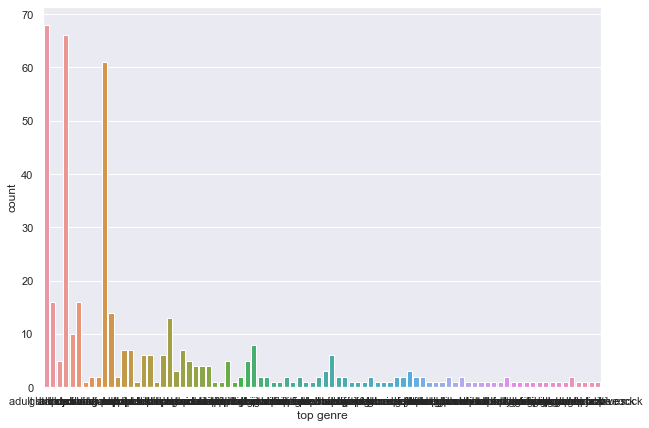

In [10]:
sns.set(rc = {'figure.figsize':(10,7)})
sns.countplot(x = data['top genre'],)

# It is evident that classes are not normally distributed and there is an  imbalance in classes 
# so no model will perform well unless the classes are balanced out

In [11]:
# Label Encoding to change the categorical variables to numbers for analysis

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['top genre'] = le.fit_transform(data['top genre'])

# In this dataset the target variable has multiple classes varying with the genres of song. 
# After label encoding there were 86 unique classes

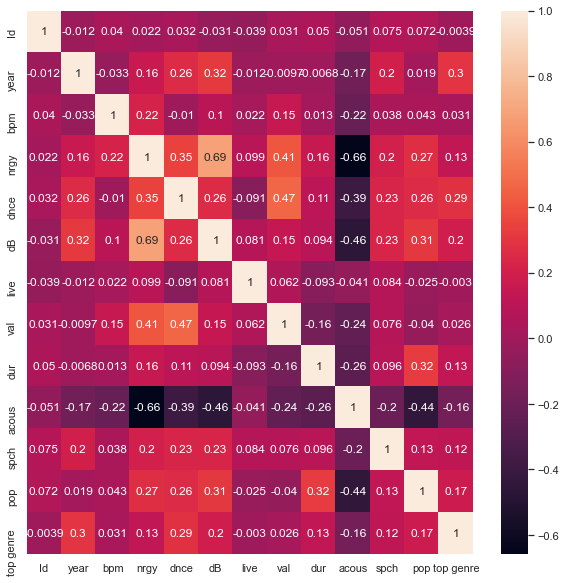

In [12]:
# Assessing the correlation between dependent and independent features.
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [13]:
# Dividing the data into independent features and target variable
X = data.drop(columns = ['Id','title','artist','top genre'])
y = data.iloc[:,[-1]]

In [42]:
# Importing the test set
test_data = pd.read_csv("/Users/admin/CS98XClassificationTest.csv")

In [43]:
# Checking for null values in the test set
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Id      113 non-null    int64 
 1   title   113 non-null    object
 2   artist  113 non-null    object
 3   year    113 non-null    int64 
 4   bpm     113 non-null    int64 
 5   nrgy    113 non-null    int64 
 6   dnce    113 non-null    int64 
 7   dB      113 non-null    int64 
 8   live    113 non-null    int64 
 9   val     113 non-null    int64 
 10  dur     113 non-null    int64 
 11  acous   113 non-null    int64 
 12  spch    113 non-null    int64 
 13  pop     113 non-null    int64 
dtypes: int64(12), object(2)
memory usage: 12.5+ KB


In [44]:
test_data.head()

,Id,title,artist,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,454,Pump It,The Black Eyed Peas,2005,154,93,65,-3,75,74,213,1,18,72
1,455,"Circle of Life - From ""The Lion King""/Soundtra...",Elton John,1994,161,39,30,-15,11,14,292,26,3,59
2,456,We Are The Champions - Remastered 2011,Queen,1977,64,46,27,-7,12,18,179,38,3,76
3,457,Insomnia - Radio Edit,Faithless,2010,127,92,71,-9,37,53,216,6,4,50
4,458,This Eve of Parting,John Hartford,2018,115,46,56,-12,21,34,153,18,3,44


In [45]:
# dropping same variables as we did in the train set
X_testdata = test_data.drop(columns = ['Id','title','artist'])  

In [18]:
# Splitting the train data set for validation as the test set does not have actual values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42, test_size = 0.3)

In [19]:
# As the features had different ranges, we scaled the data so that weights are distributes fairly across board

# Importing the Standardscaler to scale the independent features to make the data follow same scale
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)

In [20]:
# Putting the scaled values back into the dataframe with column names
X_train = pd.DataFrame(X_train, columns = ['year','bpm','nrgy','dnce','dB','live','val','dur','acous','spch','pop'])
X_test = pd.DataFrame(X_test, columns = ['year','bpm','nrgy','dnce','dB','live','val','dur','acous','spch','pop'])

In [46]:
# Scaling the real test data as we did in the train-test split
X_testdata = standard_scaler.transform(X_testdata)

In [48]:
# Putting the scaled values back into the dataframe with column names
X_testdata = pd.DataFrame(X_testdata, columns = ['year','bpm','nrgy','dnce','dB','live','val',
                                                          'dur','acous','spch','pop'])

## Section 2 - Model Building and Selection

### Baseline Model - Logistic Regression

>The baseline model was Logistic Regression. By default, it only supports binary classification but can be modified to support multiclass. This was achieved using One-Versus-Rest (OVR) algorithm which nvolves splitting the dataset into multiple binary classification problem. Each binary classifier is then trained on this and predictions are then made with the most confident model.

In [81]:
# importing Logistic Regresssion package
from sklearn.linear_model import LogisticRegression

# Importing confusion matrix and classification report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Fitting data on the train set using OVR
lr = LogisticRegression(solver = 'newton-cg',multi_class='ovr',random_state=1)
lr.fit(X_train,y_train)

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(multi_class='ovr', random_state=1, solver='newton-cg')

In [24]:
# Predicting on the train-test split dataset
y_pred = lr.predict(X_test)

# Assessing the performance of the model
lr_conf_matrix = confusion_matrix(y_test,y_pred)
lr_report = classification_report(y_test,y_pred)

print(lr_report)
print(lr_conf_matrix)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.33      0.60      0.43        20
           3       0.00      0.00      0.00         0
           4       0.34      0.79      0.48        19
           6       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         2
          17       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         1
          24       0.00      0.00      0.00         3
          25       0.25      0.25      0.25         4
          30       0.00      0.00      0.00         1
          31       0.00    

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/admin/opt/anaconda3/

In [82]:
# Checking the accuracy score 
lr.score(X_train,y_train)

0.42810457516339867

In [63]:
# Predicting on the real test dataset
lr_pred = lr.predict(X_testdata)

# Assigning 'Id' to a variable called Id for easy manipulation
Id = test_data.iloc[:,0].values

# Appending the Logistic Regression results to transform to csv
Result = pd.DataFrame()
Result['Id']= Id
Result['top genre'] = pd.DataFrame(le.inverse_transform(lr_pred))
Result.to_csv('LogisticReg_pred.csv', index= False)

# Had an accuracy of 0.32142

### Model 1 - Random Forest Classifier

> Random forests are a significant adaptation of bagging in which a large number of de-correlated trees are built and then averaged. Random forests perform similarly to boosting, but they can perform better when tuned approprately using hyperparameters. It works well with both categorical and continuous values.

In [73]:
# Importing package for RandomForest
from sklearn.ensemble import RandomForestClassifier 
rnd_clf = RandomForestClassifier(n_estimators=50, min_samples_split=5, max_depth=3,n_jobs=-1, random_state = 23)

rnd_clf.fit(X_train, y_train)
rnd_y_pred = rnd_clf.predict(X_test)

<ipython-input-73-67f4714578de>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rnd_clf.fit(X_train, y_train)


In [74]:
# Assessing the performance of the model
rf_conf_matrix = confusion_matrix(y_test,rnd_y_pred)
rf_report = classification_report(y_test,rnd_y_pred)

print(lr_report)
print(lr_conf_matrix)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.33      0.60      0.43        20
           3       0.00      0.00      0.00         0
           4       0.34      0.79      0.48        19
           6       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         2
          17       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         1
          24       0.00      0.00      0.00         3
          25       0.25      0.25      0.25         4
          30       0.00      0.00      0.00         1
          31       0.00    

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [83]:
# Checking the accuracy score 
rnd_clf.score(X_train,y_train)

0.3790849673202614

In [75]:
# Predicting on the real test dataset
rnd_pred = rnd_clf.predict(X_testdata)

# Appending the Random Forest results to transform to csv
Result['top genre'] = pd.DataFrame(le.inverse_transform(rnd_pred))
Result.to_csv('RndFor_pred.csv', index= False)

# Had an error of 0.32142

### *Random Forest  Feature Importance using Mutual Information*

In [33]:
# Mutual information is used as a general form of a correlation coefficient, i.e dependence measure 
# between features. 

from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X_train, y_train)

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [34]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending = False)

year     0.406831
spch     0.364053
dur      0.282957
nrgy     0.256452
pop      0.242618
acous    0.229087
bpm      0.147581
dnce     0.137636
dB       0.067573
live     0.020808
val      0.000000
dtype: float64

<AxesSubplot:title={'center':'Mutual Information Plot'}>

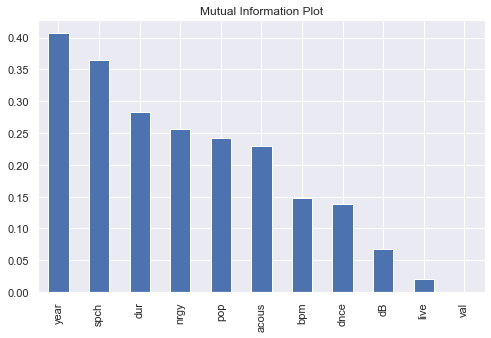

In [37]:
# Mutual information plot
plt.title("Mutual Information Plot")
mutual_info.sort_values(ascending=False).plot.bar(figsize = (8,5))

In [38]:
# Selecting the top n features
from sklearn.feature_selection import SelectKBest

# Selecting the top five features
five_cols = SelectKBest(mutual_info_classif, k=5)

# Fitting the top 5 features according to mutual importance
five_cols.fit(X_train,y_train)
X_train.columns[five_cols.get_support()]

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Index(['year', 'nrgy', 'dur', 'spch', 'pop'], dtype='object')

In [39]:
# Dropping other features apart from the top 5
rndfor_X_train = X_train.drop(['bpm','dnce','dB','live','val','acous'],axis=1)

In [40]:
# Fitting the random forest classifier again using the top 5 features
rnd_clf.fit(rndfor_X_train,y_train)

# Checking the accuracy score 
rnd_clf.score(rndfor_X_train,y_train)

<ipython-input-40-ca7a60755502>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rnd_clf.fit(rndfor_X_train,y_train)


0.3790849673202614

In [49]:
# Checking the predictions on the real test data after dropping smae features
rndfor_X_testdata = X_testdata.drop(['bpm','dnce','dB','live','val','acous'],axis=1)
rndfor_y_pred = rnd_clf.predict(rndfor_X_testdata)

In [72]:
# Exporting the result to csv
Result['top genre'] = pd.DataFrame(le.inverse_transform(rndfor_y_pred))
Result.to_csv('Randfor_top5.csv', index= False)

# The error remained the same with 0.32142

# Choosing the 5 best variables does not help as the accuracy does not increase. Therefore, we will use the 
# performance of the previous model which uses all variables

### Model 2 - Voting Classifier

>Voting Classifier is a machine learning algorithm that uses an ensemble of different models to predict an outcome (class) based on the maximum probability of the selected class being the output. This can either be a hard or soft vote. 

In [77]:
from sklearn.tree import DecisionTreeClassifier


lr_clf1 = LogisticRegression(multi_class='multinomial', random_state=1)
svc_clf2 = SVC(gamma='auto')
dt_clf3 = DecisionTreeClassifier(random_state=1)
rf_clf4 = RandomForestClassifier(n_estimators=50, random_state=1)


four_voters = VotingClassifier(estimators=[('lr', lr_clf1),
                                           ('svc', svc_clf2),('dt',dt_clf3),
                                           ('rf', rf_clf4)], voting='hard')

four_voters.fit(X_train,y_train)
train_vote_predict = four_voters.predict(X_test)

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [78]:
from sklearn.metrics import accuracy_score
for classifier in (lr_clf1, svc_clf2, dt_clf3, rf_clf4, four_voters):
    classifier.fit(X_train, y_train)
    ypred = classifier.predict(X_test)
    print(classifier.__class__.__name__, accuracy_score(y_test, ypred))

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

LogisticRegression 0.3106060606060606
SVC 0.3484848484848485
DecisionTreeClassifier 0.18181818181818182
RandomForestClassifier 0.2727272727272727


/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier 0.3106060606060606


In [84]:
# Checking the accuracy score 
four_voters.score(X_train,y_train)

0.696078431372549

In [79]:
# Predicting on the actual test set
four_voters_pred = four_voters.predict(X_testdata)

# Exporting to CSV
Result['top genre'] = le.inverse_transform(four_voters_pred)
Result.to_csv('FourVotclas.csv', index= False)

# Had an accuracy of 0.33928

# It was observed that using a voting classifier without the Decision Trees gave the same
# accuracy on the test score. So this model was maintained

### Other Model Performance

Different models were used throughout the classification project. Most did not perform well even as parameters were adjusted to increase prediction or accuracy. Naives Bayes are probabilistic classification predictors which is based on Bayes theorem. When the assumption of independence holds, this algorithm works well. However, for our dataset it was not a fit at all, irrespective of any parameter adjusted. This may be due to the fact that it does not satisfy this assumption.

K Nearest Neighbors(KNN) which assumes that similar things are in close proximity to each other, hence belong to the same class was also applied. This algorithm which suits multi-class performed poorly. This is because this algorithm is suscepitle to class imbalance and as this was the case of our dataset. SVC which is also good at finding the best linear separator and non-linear separator using the kernel trick, was not a good fit.

We also used Decision trees which progressively divides a dataset into smaller section while developing an associated decision tree. Even though it is good for categorical value, it has the disadvantage of overfitting. However the Decision tree had a higher prediction of 0.25 compared to 0 which KNN and Naives Bayes produced.


### GridSearchCV for SVC

>Several models include parameters that need to be tuned in order to generate a model that can fit the train data and make accurate predictions. Going over this manually can be cumbersome, hence a scikit-learn function called GridSearchCV. GridSearchCV explores a range of parameters and finds the best-performing parameter combination according to a scoring method. This was used to determine the best features in selecting models.

In [52]:
# importing GridSearch
from sklearn.model_selection import GridSearchCV

In [54]:
# Parameter definition
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [5, 1, 0.3, 0.03, 0.001],
              'kernel': ['rbf', 'poly'],
              'degree': [1,3,5]
             }

In [55]:
svc_grid = GridSearchCV(SVC(), param_grid, refit = True)

# Fitting the model for grid search
svc_grid.fit(X_train, y_train)

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'degree': [1, 3, 5],
                         'gamma': [5, 1, 0.3, 0.03, 0.001],
                         'kernel': ['rbf', 'poly']})

In [56]:
print("Grid search results" )
print("\n The best estimator is:\n",svc_grid.best_estimator_)
print("\n The best score is:\n",svc_grid.best_score_)
print("\n The best parameters are:\n",svc_grid.best_params_)

Grid search results

 The best estimator is:
 SVC(C=1, degree=1, gamma=0.3)

 The best score is:
 0.359439450026441

 The best parameters are:
 {'C': 1, 'degree': 1, 'gamma': 0.3, 'kernel': 'rbf'}


In [58]:
# Fitting the SVC with the best parameters
best_svc_grid = SVC(C = 0.01, gamma = 0.3, kernel = 'rbf', degree = 1, random_state = 42)

best_svc_grid.fit(X_train,y_train)

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC(C=0.01, degree=1, gamma=0.3, random_state=42)

In [85]:
# Checking the accuracy score 
best_svc_grid.score(X_train,y_train)

0.1568627450980392

In [64]:
# Predicting on the actual test set
gridcv_pred = best_svc_grid.predict(X_testdata)

# Exporting to CSV
Result['top genre'] = le.inverse_transform(gridcv_pred)
Result.to_csv('SVC_gridcv.csv', index= False)

# Had a low accuracy of 0.17857

### Conclusion

In [2]:
# Package to print the final RMSE values
from tabulate import tabulate

In [7]:
# from tabulate import tabulate

model_perf = [['Logistic Regression', 0.42810, 0.32142], ['Random Forest Classifier', 0.37908, 0.32142], 
     ['Voting Classifier', 0.696078, 0.33928]]
              
acc_table = tabulate(model_perf, headers = ['Model type', 'Train Accuracy', 'Test Accuracy'], tablefmt='orgtbl')
print(acc_table)


| Model type               |   Train Accuracy |   Test Accuracy |
|--------------------------+------------------+-----------------|
| Logistic Regression      |         0.4281   |         0.32142 |
| Random Forest Classifier |         0.37908  |         0.32142 |
| Voting Classifier        |         0.696078 |         0.33928 |


The main preformance metric for this classification problem is accuracy, and so all models were judged on this in addition to comparison to the baseline model. Due to class imbalance in the target variable it is found out that the accuracy is fairly low even after applying several models and optimisation hyperparameters. We also tried choosing the best features using information gain but the variables which were selected as the best.

Overall, in comparison to the base model, the Voting Classifier comprising of Logistic Regression, Decision Tree, Random Forest and SVC gave a slightly higher accuracy of 0.33928. This was closely followed by the independent Random Classifier and Logistic Regression with 0.32142 each. The Voting Classifier had both a higher train and test accuracy compared to the baseline model.

### Future Works/ Recommendation

Given the limited time and resource limitations, we would want to perform a more extensive hyperparameter search using GridSearch on the best performing models. Furthermore, given the huge class inbalance, we would explore other forms of learning from the data e.g using neural networks. We look forward to exploring more methods to rectify class imbalance. Techniques like SMOTE could be applied to balance out the class weights, so the less frequent classes have more weight and more frequent classes have less weights.